____
# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
### Projeto 2: Construindo um Sistema de Intervenção para Estudantes
___

## Introduction

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

## Overview

Com o aumento do uso da tecnologia na educação, uma vasta quantidade de dados foi disponibilizada para avaliação e predição. Registros das atividades dos alunos, notas, interações com os professores e colegas, entre outros, agora são captados em tempo real por sistemas de gerenciamento de aprendizagem como o Canvas e o Edmodo. Esse fenômeno é particularmente forte em aulas à distância, que estão tornando-se populares até mesmo no Ensino Fundamental e Médio. Dentro de todos os níveis da educação, existe um impulso para aumentar a probabilidade de sucesso do aluno sem diluir a educação nem encorajar comportamentos que não vão melhorar os problemas na raiz. A taxa de graduação frequentemente é o critério preferencial, e os educadores procuram novas maneiras de predizer o sucesso ou o fracasso dos estudantes cedo o bastante para organizar intervenções eficazes.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: **
Esse é um problema de classificação, pois o resultado esperado é uma variável discreta boolean. Para problemas de regressão o resultado esperado é uma variável contínua.

## Imports Section

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (25,25)

import seaborn as sns

from sklearn.cross_validation import train_test_split
from time import time
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from scipy.stats import expon 

from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

### Exploring

In [3]:
student_data = pd.read_csv("student-data.csv")
print("Os dados dos estudantes foram lidos com êxito!")

Os dados dos estudantes foram lidos com êxito!


#### dataset head

In [33]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


#### features stats info

In [34]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


#### general info

In [35]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


In [21]:
# TODO: Calcule o número de estudante
students_status = student_data['passed']
n_students = students_status.size

# TODO: Calcule o número de atributos
n_features = student_data.columns.size - 1

# TODO: Calcule o número de alunos aprovados
n_passed = students_status[students_status =='yes'].size

# TODO: Calcule o número de alunos reprovados
n_failed = students_status[students_status =='no'].size

# TODO: Calcule a taxa de graduação
grad_rate = (n_passed / n_students) * 100

# Imprima os resultados
print ("Número total de estudantes: {}".format(n_students))
print ("Número de atributos: {}".format(n_features))
print ("Número de estudantes aprovados: {}".format(n_passed))
print ("Número de estudantes reprovados: {}".format(n_failed))
print ("Taxa de graduação: {:.2f}%".format(grad_rate))

Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [22]:
# Extraia as colunas dos atributo
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo 'passed'
target_col = student_data.columns[-1] 

# Mostre a lista de colunas
print ("Colunas de atributos:\n{}".format(feature_cols))
print ("\nColuna-alvo: {}".format(target_col))

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print ("\nFeature values:")
print (X_all.head())

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (_dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [23]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


## Histogram on Y axis

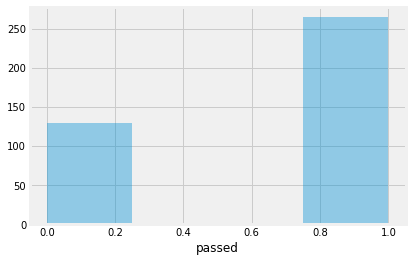

In [24]:
all = preprocess_features(student_data)
sns.distplot(all['passed'],kde=False)

## Correlation

In [25]:
corr = all.corr()
corr

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
school_GP,1.000000,-1.000000,-0.012286,0.012286,-0.377610,-0.279797,0.279797,0.064866,-0.064866,0.045923,...,0.133578,-0.060700,0.047926,-0.032988,0.007152,-0.114209,-0.065087,0.042651,0.088480,0.031254
school_MS,-1.000000,1.000000,0.012286,-0.012286,0.377610,0.279797,-0.279797,-0.064866,0.064866,-0.045923,...,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.031254
sex_F,-0.012286,0.012286,1.000000,-1.000000,0.028606,-0.028504,0.028504,0.089862,-0.089862,0.023443,...,-0.044113,0.102023,-0.058971,-0.238744,-0.075897,-0.268171,-0.274194,-0.143588,0.066962,-0.070618
sex_M,0.012286,-0.012286,-1.000000,1.000000,-0.028606,0.028504,-0.028504,-0.089862,0.089862,-0.023443,...,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.070618
age,-0.377610,0.377610,0.028606,-0.028606,1.000000,0.146722,-0.146722,-0.037847,0.037847,-0.029598,...,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.179645
address_R,-0.279797,0.279797,-0.028504,0.028504,0.146722,1.000000,-1.000000,0.072472,-0.072472,-0.042572,...,-0.216842,-0.005257,-0.014258,-0.034878,-0.068835,0.093494,0.101126,0.040355,0.027874,-0.052282
address_U,0.279797,-0.279797,0.028504,-0.028504,-0.146722,-1.000000,1.000000,-0.072472,0.072472,0.042572,...,0.216842,0.005257,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.052282
famsize_GT3,0.064866,-0.064866,0.089862,-0.089862,-0.037847,0.072472,-0.072472,1.000000,-1.000000,-0.149612,...,-0.000720,-0.034395,0.022776,-0.017695,-0.023064,-0.101521,-0.103425,0.028992,-0.035783,-0.041842
famsize_LE3,-0.064866,0.064866,-0.089862,0.089862,0.037847,-0.072472,0.072472,-1.000000,1.000000,0.149612,...,0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.041842
Pstatus_A,0.045923,-0.045923,0.023443,-0.023443,-0.029598,-0.042572,0.042572,-0.149612,0.149612,1.000000,...,-0.070074,0.040451,-0.025179,-0.038717,-0.003459,0.030590,-0.006045,-0.022307,0.134937,0.044050


## Heatmap

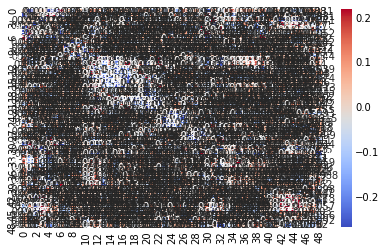

In [26]:
heat = np.copy(corr)
heat[heat == 1] = 0
sns.heatmap(data=heat, cmap="coolwarm", annot=True, robust=True)

### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [27]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn.cross_validation import train_test_split

# TODO: Estabeleça o número de pontos de treinamento
num_train = 300

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=num_train, random_state = True)

# Mostre o resultado da distribuição
print ("O conjunto de treinamento tem {} amostras.".format(X_train.shape[0]))
print ("O conjunto de teste tem {} amostras.".format(X_test.shape[0]))

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

**Resposta: ** <br>
<br>
#### Gaussian NB
##### Aplicacao Mundo real:
É utilizado em aplicaçõe que envolvem categorização de textos, como por exemplo em máquinas de detecção de Spam (https://pdfs.semanticscholar.org/819f/041832aa2c3f22e2e182183a08c0281dda0a.pdf), categorização de notícias ou artigos (http://ijoes.vidyapublications.com/paper/Vol13/39-Vol13.pdf) e diagnósticos médicos ( https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5203736/), dentre outros.
##### Vantagens:
Efiente, não influenciado por outliers, pode ser aplicado em problemas não lineares e possui uma abordagem estatística.
##### Desvantagens:
Parte do princípio que todas as features são independentes, o que não é sempre o caso.
##### Bom candidato porque:
Por sua simplicidade o que o torna um bom ponto de partida para a análise.
<br><br>
#### Random Forest
##### Aplicacao Mundo real:
Sua aplicação está relacionada nas áreas de Discovery Knowledge especialmente nos casos de uso de suporte técnico (http://ieeexplore.ieee.org/document/5994250/), sistemas de recomendação (https://subs.emis.de/LNI/Proceedings/Proceedings165/170.pdf), sistemas especialistas de seguros (http://article.sapub.org/10.5923.j.statistics.20170702.07.html), diagnósticos médicos (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2263124/), dentre outros.
##### Vantagens:
É um modelo de classificação poderoso e acurado com uma boa performance em muitos tipos de problemas inclusive não lineares.
##### Desvantagens:
De dificil interpretação visual, overfiting pode ocorrer com facilidade e é necessário escolher o número de árvores. 
##### Bom candidato porque:
Porque com ele e possivel separar diferentes classes com pouco esforço.
<br><br>
#### SVM
##### Aplicacao Mundo real:
SVM tem aplicação mais utilizada no ramo de identificação de padrões, sobretudo em imagens. Por exemplo, na área de imagens médicas, possui diversos casos de uso onde é possível identificar padrões que podem indicar evolução para diferentes tipos de enfermidades, seja em imagens de duas dimensões como por exemplo um simples raio-x (http://ieeexplore.ieee.org/document/7424297/) ou até mesmo imagens volumétricas, de três dimensões de uma ressonância magnética ( http://omnipax.com.br/livros/2012/AVC/avc-livro.pdf, capítulo 1).
##### Vantagens:
Performático, não é influenciado por outiliers e não sensível ao overfitting. 
##### Desvantagens:
Sucetível a overfiting depedendo do kernel e geralmente não é a melhor escolha para um grande número de features.
##### Bom candidato porque:
Por ser uma boa alternativa para separação de classes não lineares mesmo não desempenhando bem com um grande número de features.

### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [43]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print ("O modelo foi treinado em {:.4f} segundos".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print ("As previsões foram feitas em {:.4f} segundos.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print ("Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print ("Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [44]:
# TODO: Inicialize os três modelos
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state=99)
clf_C = svm.SVC(random_state=99)

# TODO: Configure os tamanho dos conjuntos de treinamento
# TODO: Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
# train_predict(clf, X_train, y_train, X_test, y_test)
for clf in [clf_A, clf_B, clf_C]:
    print("\n------------------------------------------------")
    for n_train in [100, 200, 300]:
        train_predict(clf, X_train[:n_train], y_train[:n_train], X_test, y_test)
        print("\n")


------------------------------------------------
Treinando um GaussianNB com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0000 segundos
As previsões foram feitas em 0.0040 segundos.
Pontuação F1 para o conjunto de treino: 0.8201.
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de teste: 0.7852.


Treinando um GaussianNB com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0000 segundos
As previsões foram feitas em 0.0040 segundos.
Pontuação F1 para o conjunto de treino: 0.7681.
As previsões foram feitas em 0.0010 segundos.
Pontuação F1 para o conjunto de teste: 0.7761.


Treinando um GaussianNB com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0015 segundos
As previsões foram feitas em 0.0005 segundos.
Pontuação F1 para o conjunto de treino: 0.7866.
As previsões foram feitas em 0.0010 segundos.
Pontuação F1 para o conjunto de teste: 0.7852.



------------------------------------------------
Treinando um RandomForestClassifi

### Resultados em tabelas
Edite a célula abaixo e veja como a tabela pode ser desenhada em [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). Você deve salvar seus resultados abaixo nas tabelas fornecidas.

** Classificador 1 - GaussianNB  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                | 0.0010               | 0.0003                      | 0.7639                     | 0.8027               |
| 200                                | 0.0010               | 0.0004                      | 0.8145                     | 0.7857               |
| 300                                | 0.0010               | 0.0003                      | 0.7893                     | 0.8143               |

** Classificador 2 - RandomForestClassifier  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                | 0.0133               | 0.0013                      | 1.0000                     | 0.8029               |
| 200                                | 0.0151               | 0.0015                      | 0.9883                     | 0.7970               |
| 300                                | 0.0134               | 0.0017                      | 0.9949                     | 0.7971               |

** Classificador 3 - SVM  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                | 0.0014               | 0.0009                      | 0.8722                     | 0.7801               |
| 200                                | 0.0039               | 0.0014                      | 0.8649                     | 0.8280               |
| 300                                | 0.0082               | 0.0019                      | 0.8559                     | 0.8535               |

### Performance Analysis

#### Confusion Matrix

In [45]:
for clf in [clf_A, clf_B, clf_C]:
    print("\n------------------------------------------------")
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_true=y_test, y_pred= predictions)
    df_cm =pd.DataFrame(data=cm,index=['Real False', 'Real True'], columns=['Pred False', 'Pred True'])
    print(clf.__class__.__name__)
    print(df_cm)



------------------------------------------------
GaussianNB
            Pred False  Pred True
Real False          13         15
Real True           14         53

------------------------------------------------
RandomForestClassifier
            Pred False  Pred True
Real False          14         14
Real True           19         48

------------------------------------------------
SVC
            Pred False  Pred True
Real False           7         21
Real True            7         60


## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

**Resposta: **<br>
Em méritos de desempenho no tempo de treinamento e tempo de estimativa o algoritimo Gaussian NB obteve o melhor desempenho, em pontuação F1 com dados de treinamento o algoritimo Random Forest obteve as notas mais altas. O Algoritimo SVM alcanlou a maior pontuação de F1 com dados de testes atingindo 85,35% com 300 amostras.<br>
Fazendo um comparativo custo beneficio entre desempenho de tempo e maiores resultados na pontuação F1 com dados de teste podemos descartar o algoritimo Random Forest (pelo menos nos parametros setados para o treinamento). Entre o melhor tempo do Gaussian NB e o maior F1 com dados de testes do SVM a escolha é o SVM já que para o conjunto de dados analisados o seu desempenho de tempo é aceitável e seu score maior.

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: **<br>
Máquina de Vetor de Suporte (SVM) é um algoritmo de aprendizado de máquina supervisionado que pode ser empregado para propósitos de classificação e regressão. SVMs são mais comumente usados em problemas de classificação, baseiam-se na ideia de encontrar um hiperplano que melhor divida um conjunto de dados em duas classes, como mostra a imagem abaixo. <br>
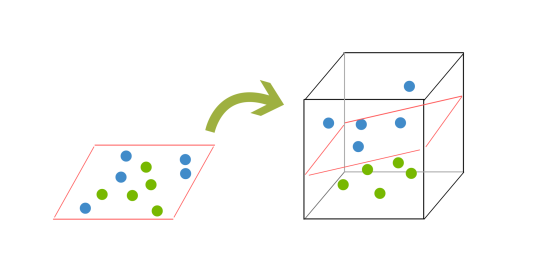
<br>* fonte http://blog.aylien.com/support-vector-machines-for-dummies-a-simple/ *
<br>
<br><br>
A principal característica do SVM é maximizar a separação entre duas classes, para isso ele utiliza somente as amostras que estão na fronteira de decisão, escolhendo as que separam mais as duas classes. <br>
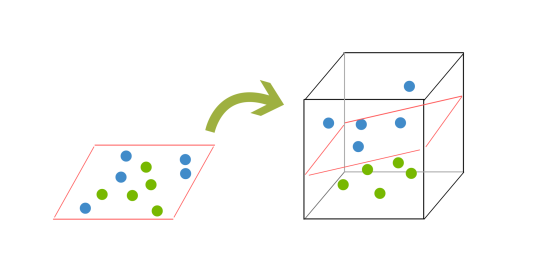
<br>* fonte http://blog.aylien.com/support-vector-machines-for-dummies-a-simple/ *
<br>
Outra característica importante é o truque do kernel, com o qual é possível transportar as amostras para outro plano onde classes que não são separáveis linearmente tornam-se separáveis por uma reta no caso de quando não há um hiperplano claro.<br>
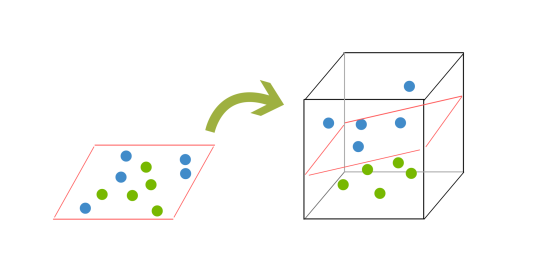
<br>* fonte http://blog.aylien.com/support-vector-machines-for-dummies-a-simple/ *


### Implementação: Calibrando o Modelo (_Tuning_)
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [50]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'

# TODO: Crie a lista de parâmetros que você gostaria de calibrar
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
parameters = {'C': Cs, 'gamma' : gammas}

# TODO: Inicialize o classificador
clf = svm.SVC(random_state=99)

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=f1_scorer)


In [51]:
# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj =  grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print ("O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(clf, X_train, y_train)))
print ("O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(clf, X_test, y_test)))

As previsões foram feitas em 0.0080 segundos.
O modelo calibrado tem F1 de 0.9778 no conjunto de treinamento.
As previsões foram feitas em 0.0040 segundos.
O modelo calibrado tem F1 de 0.8428 no conjunto de teste.


### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: **<br>
O modelo calibrado tem F1 de 0.8428 no conjunto de teste e o nao calibrado uma pontuação F1 para o conjunto de teste de 0.8108. O tempo de previsao foi um pouco maior, mas ainda aceitavel. Portanto o modelo calibrado demonstrou-se melhor.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.